In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
np.set_printoptions(precision=3)

## Loading Dataset

In [3]:
df = pd.read_csv('cleandiabetes.csv')

In [4]:
df.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.0,148.0,72.0,35.0,219.029355,33.6,0.627,50.0,1
1,1,1.0,85.0,66.0,29.0,70.346930,26.6,0.351,31.0,0
2,2,8.0,183.0,64.0,32.0,270.585967,23.3,0.672,32.0,1
3,3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1
5,5,5.0,116.0,74.0,32.0,127.850935,25.6,0.201,30.0,0
6,6,3.0,78.0,50.0,32.0,88.000000,31.0,0.248,26.0,1
7,7,10.0,115.0,72.0,32.0,136.774906,35.3,0.134,29.0,0
8,8,2.0,197.0,70.0,45.0,543.000000,30.5,0.158,53.0,1
9,9,8.0,125.0,96.0,32.0,156.017990,32.3,0.232,54.0,1


In [5]:
df_feature = df.drop('Outcome', axis=1)
df_target = df['Outcome']

df_feature.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6.0,148.0,72.0,35.0,219.029355,33.6,0.627,50.0
1,1,1.0,85.0,66.0,29.0,70.346930,26.6,0.351,31.0
2,2,8.0,183.0,64.0,32.0,270.585967,23.3,0.672,32.0
3,3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [6]:
df_feature.shape

(768, 9)

In [8]:
df_feature = df_feature.drop('Unnamed: 0', axis=1)
df_feature.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.029355,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.346930,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.585967,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [9]:
df_feature.shape

(768, 8)

In [11]:
df_feature.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.994792,152.831101,32.455208,0.471876,33.240885
std,3.369578,30.438286,12.096642,8.886506,97.202582,6.875177,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,-16.559521,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,89.975693,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,32.000000,131.151646,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,189.863054,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Scaling using MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescale = scaler.fit_transform(df_feature)

In [14]:
rescale.shape

(768, 8)

In [15]:
rescale[0:5]

array([[0.353, 0.671, 0.49 , 0.304, 0.273, 0.315, 0.234, 0.483],
       [0.059, 0.265, 0.429, 0.239, 0.101, 0.172, 0.117, 0.167],
       [0.471, 0.897, 0.408, 0.272, 0.333, 0.104, 0.254, 0.183],
       [0.059, 0.29 , 0.429, 0.174, 0.128, 0.202, 0.038, 0.   ],
       [0.   , 0.6  , 0.163, 0.304, 0.214, 0.509, 0.944, 0.2  ]])

In [17]:
rescale_df = pd.DataFrame(rescale, columns=df_feature.columns)

rescale_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493742,0.249943,0.196381,0.291518,0.168179,0.204015
std,0.198210,0.196376,0.123435,0.096592,0.112691,0.140597,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.123511,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.489796,0.271739,0.171248,0.288344,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.239314,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


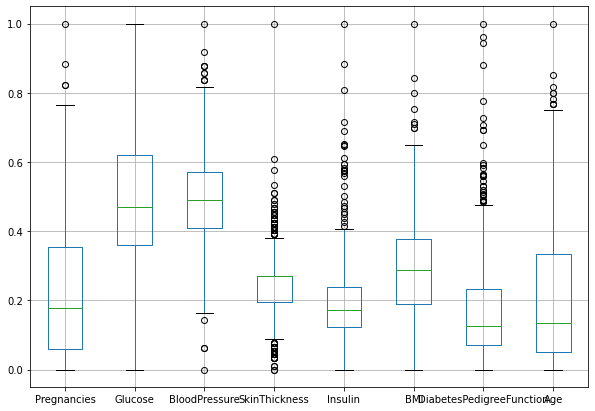

In [29]:
rescale_df.boxplot(figsize=(10,7))

plt.show()

## Scaling using StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

scaler = scaler.fit(df_feature)

standardized_features = scaler.transform(df_feature)

In [37]:
standardized_features[0:5]

array([[ 0.64 ,  0.866, -0.032,  0.564,  0.681,  0.167,  0.468,  1.426],
       [-0.845, -1.205, -0.528, -0.112, -0.849, -0.852, -0.365, -0.191],
       [ 1.234,  2.017, -0.694,  0.226,  1.212, -1.333,  0.604, -0.106],
       [-0.845, -1.074, -0.528, -0.788, -0.606, -0.634, -0.921, -1.042],
       [-1.142,  0.504, -2.679,  0.564,  0.156,  1.549,  5.485, -0.02 ]])

In [38]:
standardized_features_df = pd.DataFrame(standardized_features, columns=df_feature.columns)

standardized_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,7.661695e-18,-1.123956e-17,3.850725e-17,2.086005e-16,2.815312e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.002619e+00,-2.589294e+00,-1.743791e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.937615e-01,-5.624310e-01,-6.470648e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-3.198993e-02,2.257935e-01,-2.231791e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.297816e-01,2.257935e-01,3.812253e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.104082e+00,7.770228e+00,7.135825e+00,5.042397e+00,5.883565e+00,4.063716e+00


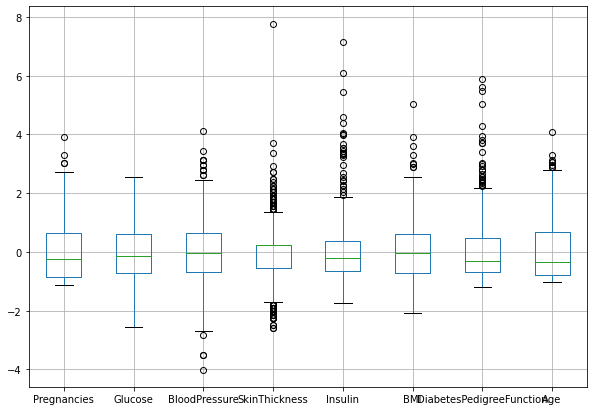

In [39]:
standardized_features_df.boxplot(figsize=(10,7))

plt.show()

## Scaling using Normalizer

### L1 norm

In [40]:
from sklearn.preprocessing import Normalizer

In [46]:
normalizer = Normalizer(norm='l1')

normalized_features = normalizer.fit_transform(df_feature)

In [52]:
l1_normalized_features_df = pd.DataFrame(normalized_features, columns=df_feature.columns)

l1_normalized_features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.010633,0.262292,0.127602,0.062029,0.388173,0.059547,0.001111,0.088612
1,0.003233,0.274816,0.213386,0.093761,0.227441,0.086001,0.001135,0.100227
2,0.013039,0.298260,0.104310,0.052155,0.441011,0.037975,0.001095,0.052155
3,0.003103,0.276169,0.204799,0.071369,0.291684,0.087195,0.000518,0.065163
4,0.000000,0.298873,0.087262,0.076355,0.366502,0.094025,0.004991,0.071991


In [53]:
l1_normalized_features_df.iloc[0]

Pregnancies                 0.010633
Glucose                     0.262292
BloodPressure               0.127602
SkinThickness               0.062029
Insulin                     0.388173
BMI                         0.059547
DiabetesPedigreeFunction    0.001111
Age                         0.088612
Name: 0, dtype: float64

In [54]:
l1_normalized_features_df.iloc[0].abs().sum()

1.0

### L2 norm

In [58]:
normalizer = Normalizer(norm='l2')

normalized_features = normalizer.fit_transform(df_feature)

In [60]:
l2_normalized_features_df = pd.DataFrame(normalized_features, columns=df_feature.columns)

l2_normalized_features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.021220,0.523415,0.254635,0.123781,0.774617,0.118829,0.002217,0.176830
1,0.007247,0.616001,0.478306,0.210165,0.509809,0.192772,0.002544,0.224659
2,0.023751,0.543294,0.190005,0.095002,0.803322,0.069174,0.001995,0.095002
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [61]:
l2_normalized_features_df.iloc[0].pow(2)

Pregnancies                 0.000450
Glucose                     0.273964
BloodPressure               0.064839
SkinThickness               0.015322
Insulin                     0.600032
BMI                         0.014120
DiabetesPedigreeFunction    0.000005
Age                         0.031269
Name: 0, dtype: float64

In [62]:
l2_normalized_features_df.iloc[0].pow(2).sum()

0.9999999999999998

### Max Norm

In [63]:
normalizer = Normalizer(norm='max')

normalized_features = normalizer.fit_transform(df_feature)

max_normalized_features_df = pd.DataFrame(normalized_features, columns=df_feature.columns)


In [64]:
max_normalized_features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.027394,0.675709,0.328723,0.159796,1.000000,0.153404,0.002863,0.228280
1,0.011765,1.000000,0.776471,0.341176,0.827611,0.312941,0.004129,0.364706
2,0.029565,0.676310,0.236524,0.118262,1.000000,0.086109,0.002483,0.118262
3,0.010638,0.946809,0.702128,0.244681,1.000000,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.000000,0.256548,0.013619,0.196429


## Categorical Form

### Scaling using Binarzer

In [65]:
from sklearn.preprocessing import Binarizer

In [66]:
binarizer = Binarizer(threshold=float((df_feature[['Pregnancies']]).mean()))

binarizer_features = binarizer.fit_transform(df_feature[['Pregnancies']])

In [67]:
binarizer_features[0:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [68]:
for i in range(1, df_feature.shape[1]):
  scaler = Binarizer(threshold=float((df_feature[[df_feature.columns[i]]]).mean())).fit(df_feature[[df_feature.columns[i]]])
  new_binarizer_features = scaler.transform(df_feature[[df_feature.columns[i]]])
  binarizer_features = np.concatenate((binarizer_features, new_binarizer_features), axis=1)

In [69]:
binarizer_features[0:10]

array([[1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1.]])

## Building Model

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [102]:
def built_model(X, Y, test_frac):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)

  model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
  y_pred = model.predict(x_test)

  print('Test_score: ', accuracy_score(y_test, y_pred))

### MinMaxScaler Score

In [104]:
built_model(rescale, df_target, 0.2)

Test_score:  0.7272727272727273


### StandardScaler Score

In [105]:
built_model(standardized_features, df_target, 0.2)

Test_score:  0.7402597402597403


### Normalizer Score

In [106]:
built_model(normalized_features, df_target, 0.2)

Test_score:  0.7012987012987013


### Binarzer Score

In [112]:
built_model(binarizer_features, df_target, 0.2)

Test_score:  0.7727272727272727
